<div align="center"><h1> Data Science Project </h1></div>
<div align="center"><h2> Classification of assertions according to their veracity values ( automatic fact-checking ) </h2></div>
<h2>Group member</h2>
<ul>
    <li>Meriem AMERAOUI</li>
    <li>Dounia BELABIOD</li>
    <li>Jihene BOUHLEL</li>
    <li>Bahaa Eddine NIL</li>
</ul>

<div class="alert alert-block alert-info" align="center">
    <h1>
        Basics
    </h1>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import pickle
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Compte rendu de classification
def cpt_mal_classes(y_test_func, result_func):
    nb_func = 0
    for i in range(len(y_test_func)):
        if y_test_func[i] != result_func[i]:
            nb_func += 1
    print (f'Taille des données {len(y_test_func)} mal classés {nb_func}\n')

warnings.filterwarnings("ignore", category = FutureWarning)

<div class="alert alert-block alert-info" align="center">
    <h1>
        Classification
    </h1>
</div>

## Reading the transformed data for the classification

In [2]:
df = pd.read_csv('attemps/tfcleanupsample2.csv', sep = ';')
display(df)

,05,1000,10000,100000,100k,101st,102000,106000,1270,150000,...,zimmerman,zipper,zippered,zuma,Source_africacheck,Source_factscan,Source_politifact,Source_snopes,Source_truthorfiction,RatingName
0,-0.037398,-0.037398,-0.074953,-0.037398,-0.037398,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,...,-0.037398,-0.037398,-0.037398,-0.037398,0,0,0,1,0,0
1,-0.037398,-0.037398,-0.074953,-0.037398,-0.037398,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,...,-0.037398,-0.037398,-0.037398,-0.037398,0,0,1,0,0,1
2,-0.037398,-0.037398,-0.074953,-0.037398,-0.037398,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,...,-0.037398,-0.037398,-0.037398,-0.037398,0,0,1,0,0,1
3,-0.037398,-0.037398,-0.074953,-0.037398,-0.037398,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,...,-0.037398,-0.037398,-0.037398,-0.037398,0,0,1,0,0,1
4,-0.037398,-0.037398,-0.074953,-0.037398,-0.037398,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,...,-0.037398,-0.037398,-0.037398,-0.037398,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,-0.037398,-0.037398,-0.074953,-0.037398,-0.037398,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,...,-0.037398,-0.037398,-0.037398,-0.037398,0,0,1,0,0,1
712,-0.037398,-0.037398,-0.074953,-0.037398,-0.037398,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,...,-0.037398,-0.037398,-0.037398,-0.037398,0,0,0,1,0,0
713,-0.037398,-0.037398,-0.074953,-0.037398,-0.037398,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,...,-0.037398,-0.037398,-0.037398,-0.037398,0,0,0,1,0,1
714,26.739484,-0.037398,-0.074953,-0.037398,-0.037398,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,...,-0.037398,-0.037398,-0.037398,-0.037398,1,0,0,0,0,0


## Define the learning variables and the variable to predict

In [3]:
array = df.values
X = array[:,0:-1]
y = array[:,-1]

## Features selection

In [4]:
# feature extraction
selectKBest = SelectKBest(score_func = f_classif,  k = df.shape[1]//2)
selection = selectKBest.fit(X, y)
print(selection.scores_)
X_best = selection.transform(X)

# summarize selected features
display(pd.DataFrame(X_best))

[ 1.          1.          4.03389831 ... 44.87623935 43.84397728
  0.07813526]


,0,1,2,3,4,5,6,7,8,9,...,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696
0,-0.074953,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,-0.064866,-0.083859,-0.037398,-0.064866,...,-0.196071,-0.189026,-0.037398,-0.064866,-0.037398,-0.037398,-0.037398,-0.074953,0.0,1.0
1,-0.074953,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,-0.064866,-0.083859,-0.037398,-0.064866,...,-0.196071,-0.189026,-0.037398,-0.064866,-0.037398,-0.037398,-0.037398,-0.074953,1.0,0.0
2,-0.074953,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,-0.064866,-0.083859,-0.037398,-0.064866,...,-0.196071,-0.189026,-0.037398,-0.064866,-0.037398,-0.037398,-0.037398,-0.074953,1.0,0.0
3,-0.074953,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,-0.064866,-0.083859,-0.037398,-0.064866,...,-0.196071,-0.189026,-0.037398,-0.064866,-0.037398,-0.037398,-0.037398,-0.074953,1.0,0.0
4,-0.074953,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,-0.064866,-0.083859,-0.037398,-0.064866,...,-0.196071,-0.189026,-0.037398,-0.064866,-0.037398,-0.037398,-0.037398,-0.074953,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,-0.074953,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,-0.064866,-0.083859,-0.037398,-0.064866,...,-0.196071,-0.189026,-0.037398,-0.064866,-0.037398,-0.037398,-0.037398,-0.074953,1.0,0.0
712,-0.074953,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,-0.064866,-0.083859,-0.037398,-0.064866,...,-0.196071,-0.189026,-0.037398,-0.064866,-0.037398,-0.037398,-0.037398,-0.074953,0.0,1.0
713,-0.074953,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,-0.064866,-0.083859,-0.037398,-0.064866,...,-0.196071,-0.189026,-0.037398,-0.064866,-0.037398,-0.037398,-0.037398,-0.074953,0.0,1.0
714,-0.074953,-0.037398,-0.037398,-0.074953,-0.037398,-0.052926,-0.064866,-0.083859,-0.037398,-0.064866,...,-0.196071,-0.189026,-0.037398,-0.064866,-0.037398,-0.037398,-0.037398,-0.074953,0.0,0.0


## Cut the data set into a test set and a learning set

In [5]:
myTrainSize = 0.3 # 30% du jeu de données pour le test
myTestSize = 1 - myTrainSize # 70% du jeu de données pour l'entraînement
seed = 30

# Original X & y
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = myTrainSize, 
                                                    random_state = seed, test_size = myTestSize)

# X & y after the features selection
X_best_train, X_best_test, y_best_train, y_best_test = train_test_split(X_best, y, train_size = myTrainSize, 
                                                                        random_state = seed, test_size = myTestSize)

<div align="center">
    <h1>
        Testing the first classifier
    </h1>
</div>

## GaussianNB classifier

In [6]:
clfGaussianNB = GaussianNB()

clfGaussianNB.fit(X_train, y_train)

resultGaussianNB = clfGaussianNB.predict(X_test)

print(f'accuracy : {accuracy_score(resultGaussianNB, y_test):.2f}')

accuracy : 0.74


## Display the confusion matrix and the classification report

In [7]:
print (f'Matrice de confusion :\n{confusion_matrix(y_test, resultGaussianNB)}')
print (f'Classification report :\n{classification_report(y_test, resultGaussianNB)}')

Matrice de confusion :
[[174  72]
 [ 59 197]]
Classification report :
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       246
         1.0       0.73      0.77      0.75       256

    accuracy                           0.74       502
   macro avg       0.74      0.74      0.74       502
weighted avg       0.74      0.74      0.74       502



## Cross validate with 10 splits (Kfold)

In [8]:
seed = 7
myKFold = KFold(n_splits = 10, shuffle = True, random_state = seed)

## Apply the GaussianNB classifier and give the different accuracy for the 10 evaluations

In [9]:
clfGaussianNB = GaussianNB()

myScoring = 'accuracy'

score = cross_val_score(clfGaussianNB, X, y, cv = myKFold, scoring = myScoring)

print(f'Les différentes accuracy pour les 10 évaluations sont :\n{score}')
print(f'Accuracy moyenne : {score.mean():.2f} | Standard deviation : {score.std():.2f}')

Les différentes accuracy pour les 10 évaluations sont :
[0.86111111 0.94444444 0.97222222 0.90277778 0.80555556 0.86111111
 0.85915493 0.85915493 0.85915493 0.88732394]
Accuracy moyenne : 0.88 | Standard deviation : 0.05


<div align="center">
    <h1>
        Testing several classifiers
    </h1>
</div>

In [10]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RFO', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))

## Without shuffle

In [11]:
seed = 7
myScoring = 'accuracy'
scores = []
names = []

for name, model in models:
    myKFold = KFold(n_splits = 10, random_state = seed)
    startTime = time.time()
    score = cross_val_score(model, X, y, cv = myKFold, scoring = myScoring)
    endTime = time.time()
    scores.append(score)
    names.append(name)
    print(f'{name}\t({score.mean():.2f} | {score.std():.2f} | Time : {endTime - startTime:.2f})\n')

KNN	(0.50 | 0.05 | Time : 3.97)

CART	(0.86 | 0.04 | Time : 2.28)

NB	(0.89 | 0.04 | Time : 0.81)

SVC	(0.94 | 0.02 | Time : 12.59)

RFO	(0.96 | 0.01 | Time : 1.23)

LR	(0.90 | 0.04 | Time : 2.70)



## Displaying results of the different classifiers

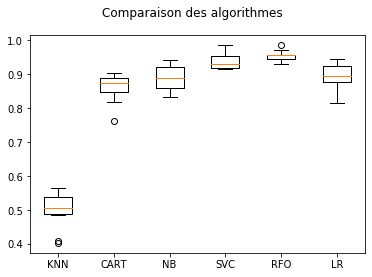

In [12]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()

## With shuffle

In [13]:
scores = []
names = []

for name, model in models:
    myKFold = KFold(n_splits = 10, shuffle = True, random_state = seed)
    startTime = time.time()
    score = cross_val_score(model, X, y, cv = myKFold, scoring = myScoring)
    endTime = time.time()
    scores.append(score)
    names.append(name)
    print(f'{name}\t({score.mean():.2f} | {score.std():.2f} | Time : {endTime - startTime:.2f})\n')

KNN	(0.50 | 0.05 | Time : 3.73)

CART	(0.85 | 0.04 | Time : 2.44)

NB	(0.88 | 0.05 | Time : 0.78)

SVC	(0.93 | 0.03 | Time : 12.50)

RFO	(0.93 | 0.04 | Time : 1.16)

LR	(0.89 | 0.05 | Time : 2.99)



## Displaying results of the different classifiers

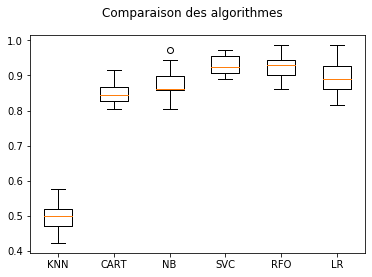

In [14]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()

## Apply GridSearchCV to RandomForestClassifier

In [15]:
gridParam = {'n_estimators': [4, 6, 9], 
             'max_features': ['log2', 'sqrt','auto'], 
             'criterion': ['entropy', 'gini'], 
             'max_depth': [2, 3, 5, 10], 
             'min_samples_split': [2, 3, 5], 
             'min_samples_leaf': [1, 5, 8]
            }

myScoring = 'accuracy'

clfGridSearchCV = GridSearchCV(estimator = RandomForestClassifier(), param_grid = gridParam, 
                               scoring = myScoring, cv = 5, n_jobs = -1, iid = True, return_train_score = True)

startTime = time.time()
clfGridSearchCV.fit(X_train, y_train)
endTime = time.time()

print(f'temps : {endTime - startTime:.2f}')
print(f'meilleur score : {clfGridSearchCV.best_score_:.2f}')
print(f'meilleurs paramètres :\n{clfGridSearchCV.best_params_}')
print(f'meilleur estimateur :\n{clfGridSearchCV.best_estimator_}')

temps : 45.10
meilleur score : 0.69
meilleurs paramètres :
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}
meilleur estimateur :
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## Apply GridSearchCV to DecisionTreeClassifier

In [16]:
gridParam = {'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
             'criterion' : ['gini', 'entropy'], 
             'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
            }

myScoring = 'accuracy'

clfGridSearchCV = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = gridParam, 
                               scoring = myScoring, cv = 10, n_jobs = -1, iid = True, return_train_score = True)

startTime = time.time()
clfGridSearchCV.fit(X_train, y_train)
endTime = time.time()

print(f'temps : {endTime - startTime:.2f}')
print(f'meilleur score : {clfGridSearchCV.best_score_:.2f}')
print(f'meilleurs paramètres :\n{clfGridSearchCV.best_params_}')
print(f'meilleur estimateur :\n{clfGridSearchCV.best_estimator_}')

temps : 35.75
meilleur score : 0.59
meilleurs paramètres :
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}
meilleur estimateur :
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


## Apply GridSearchCV to SVC

In [17]:
gridParam = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
             'gamma' : ['scale', 0.0001, 0.001, 0.01, 0.1, 1], 
             'kernel' : ['linear', 'poly', 'rbf']
            }

myScoring = 'accuracy'

clfGridSearchCV = GridSearchCV(estimator = SVC(), param_grid = gridParam, 
                               scoring = myScoring, cv = 5, n_jobs = 1, iid = True, return_train_score = True)

startTime = time.time()
clfGridSearchCV.fit(X_train, y_train)
endTime = time.time()

print(f'temps : {endTime - startTime:.2f}')
print(f'meilleur score : {clfGridSearchCV.best_score_:.2f}')
print(f'meilleurs paramètres :\n{clfGridSearchCV.best_params_}')
print(f'meilleur estimateur :\n{clfGridSearchCV.best_estimator_}')

temps : 213.08
meilleur score : 0.88
meilleurs paramètres :
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
meilleur estimateur :
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## Apply GridSearchCV to KNeighborsClassifier

In [18]:
gridParam = {'n_neighbors': list(range(1,15)), 
              'metric': ['minkowski', 'euclidean', 'manhattan']
             }

myScoring = 'accuracy'
                        
clfGridSearchCV = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = gridParam, 
                               scoring = myScoring, cv = 5, n_jobs = -1, iid = True, return_train_score = True)

startTime = time.time()
clfGridSearchCV.fit(X_train, y_train)
endTime = time.time()

print(f'temps : {endTime - startTime:.2f}')
print(f'meilleur score : {clfGridSearchCV.best_score_:.2f}')
print(f'meilleurs paramètres :\n{clfGridSearchCV.best_params_}')
print(f'meilleur estimateur :\n{clfGridSearchCV.best_estimator_}')

temps : 27.04
meilleur score : 0.48
meilleurs paramètres :
{'metric': 'minkowski', 'n_neighbors': 1}
meilleur estimateur :
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


## Do a gridsearch taking the previous parameters

In [19]:
classifiers = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

params = {
    'RandomForestClassifier' : [
        {'n_estimators' : [9, 6]}, 
        {'max_features' : ['auto', 'sqrt', 'log2']}, 
        {'criterion' : ['entropy', 'gini']}, 
        {'max_depth' : [10]}, 
        {'min_samples_split' : [2, 5]}, 
        {'min_samples_leaf' : [1, 5]}
    ], 
    'DecisionTreeClassifier' : [
        {'max_depth' : [9, 8]}, 
        {'criterion' : ['gini', 'entropy']}, 
        {'min_samples_leaf' : [1, 2, 3]}
    ],
    'SVC' : [
        {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, 
        {'gamma': ['scale', 0.0001, 0.001, 0.01, 0.1, 1]}, 
        {'kernel': ['linear', 'poly', 'rbf']}
    ],
    'KNeighborsClassifier' : [
        {'metric': ['minkowski', 'manhattan']}, 
        {'n_neighbors': [1, 2]}
    ]
}

In [20]:
class Result:
    def __init__(self, name, score, parameters, duration):
        self.name = name
        self.score = score
        self.parameters = parameters
        self.duration = duration
    def __repr__(self):
        return repr((self.name, self.score, self.parameters, self.duration))

results = []
myScoring = 'accuracy'

for key, value in classifiers.items():
    clfGridSearchCV = GridSearchCV(estimator = value, param_grid = params[key], 
                                   scoring = myScoring, cv = 10, n_jobs = 1, iid = True)
    startTime = time.time()
    clfGridSearchCV.fit(X_train, y_train)
    endTime = time.time()
    result = Result(key, clfGridSearchCV.best_score_, clfGridSearchCV.best_estimator_, endTime - startTime)
    results.append(result)

results = sorted(results, key = lambda result: result.score, reverse = True)

print(f'')
print(f'Le meilleur resultat est celui du classifieur {results[0].name} :'
      f'\n\tScore : {results[0].score:.2f}\n\tDuration : {results[0].duration:.2f}'
      f'\n\tParameters :\n\t\t{results[0].parameters}')

print(f'\nTous les résultats :\n')
for result in results:
    print(f'\t{result.name} classifier :\n\tScore : {result.score:.2f}'
          f'\n\tDuration : {result.duration:.2f}\n\tParameters :\n\t\t{result.parameters}\n')


Le meilleur resultat est celui du classifieur SVC :
	Score : 0.89
	Duration : 36.09
	Parameters :
		SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Tous les résultats :

	SVC classifier :
	Score : 0.89
	Duration : 36.09
	Parameters :
		SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

	RandomForestClassifier classifier :
	Score : 0.75
	Duration : 6.77
	Parameters :
		RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
             

## Save the best learned model

In [21]:
pickle.dump(results[0].parameters, open('models/best.sav', 'wb'))

## Reload the best model to test it with y_test

In [22]:
clf_loaded = pickle.load(open('models/best.sav', 'rb'))

print(f'Modèle chargé :\n{clf_loaded}\n')

result = clf_loaded.predict(X_test)

cpt_mal_classes(y_test, result)

print(f'Accuracy : {accuracy_score(result, y_test):.2f}\n')
print(f'Matrice de confusion :\n{confusion_matrix(y_test, result)}\n')
print(f'Classification report :\n{classification_report(y_test, result)}')

Modèle chargé :
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Taille des données 502 mal classés 50

Accuracy : 0.90

Matrice de confusion :
[[232  14]
 [ 36 220]]

Classification report :
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       246
         1.0       0.94      0.86      0.90       256

    accuracy                           0.90       502
   macro avg       0.90      0.90      0.90       502
weighted avg       0.90      0.90      0.90       502



# Creating pipeline

In [23]:
array = df.values
X = array[:,0:-1]
y = array[:,-1]

myTrainSize = 0.3 # 30% du jeu de données pour le test
myTestSize = 1 - myTrainSize # 70% du jeu de données pour l'entraînement
seed = 30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = myTrainSize, 
                                                    random_state = seed, test_size = myTestSize)

pipeline = Pipeline([('scl', StandardScaler()), ('clf', SVC(gamma='scale'))])

pipeline.fit(X_train, y_train)
result = pipeline.predict(X_test)

print('accuracy:',accuracy_score(result, y_test),'\n')

startTime = time.time()
pipeline.fit(X_train, y_train)
endTime = time.time()
print(f'temps d\'entrainement: {endTime - startTime:.2f}')

result = pipeline.predict(X_test)

print('accuracy:',accuracy_score(result, y_test),'\n')
conf = confusion_matrix(y_test, result)
print ('matrice de confusion \n',conf)
print (classification_report(y_test, result))

accuracy: 0.7569721115537849 

temps d'entrainement: 0.26
accuracy: 0.7569721115537849 

matrice de confusion 
 [[246   0]
 [122 134]]
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       246
         1.0       1.00      0.52      0.69       256

    accuracy                           0.76       502
   macro avg       0.83      0.76      0.74       502
weighted avg       0.84      0.76      0.74       502



## Loading pipeline & predict

In [24]:
pickle.dump(pipeline, open('pipelines/thebestone.pkl', 'wb'))

clf_loaded = pickle.load(open('pipelines/thebestone.pkl', 'rb'))
print(f'Pipeline chargé :\n{clf_loaded}\n')

result = clf_loaded.predict(X_test)

print('accuracy:',accuracy_score(result, y_test),'\n')
conf = confusion_matrix(y_test, result)
print ('matrice de confusion \n',conf)
print (classification_report(y_test, result))

Pipeline chargé :
Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

accuracy: 0.7569721115537849 

matrice de confusion 
 [[246   0]
 [122 134]]
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       246
         1.0       1.00      0.52      0.69       256

    accuracy                           0.76       502
   macro avg       0.83      0.76      0.74       502
weighted avg       0.84      0.76      0.74       502

